In [12]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [15]:
# 2. Load Dataset
df = pd.read_csv("/content/spam.csv", sep="\t", header=None, names=["label", "message"])
print("🔹 Dataset Shape:", df.shape)
print(df.head())


🔹 Dataset Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


/tmp/ipython-input-3093683639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


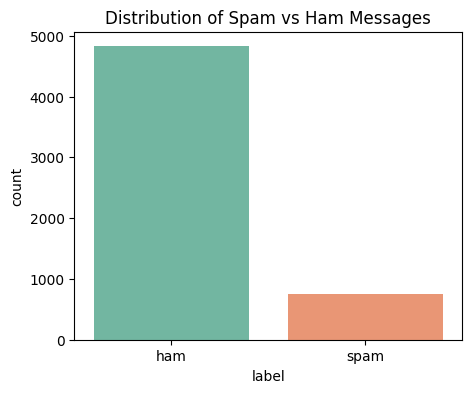

In [16]:
# 3. Visualize Label Distribution
plt.figure(figsize=(5,4))
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Spam vs Ham Messages")
plt.show()

In [17]:
# 4. Preprocessing & Feature Extraction
X = df["message"]
y = df["label"]

In [18]:
# 5.Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(X)

In [19]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# 7. Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# 8. Predictions
y_pred = model.predict(X_test)


✅ Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



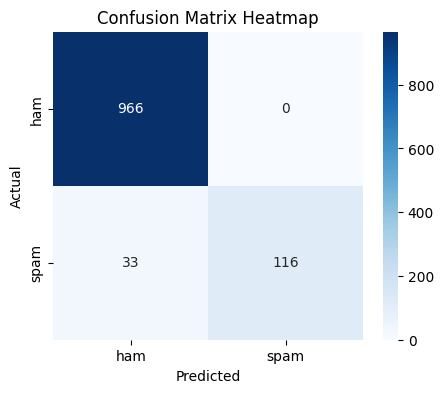

In [21]:
# 9. Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()